In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
base_dir = "./home-credit-default-risk/"

Explore the Data

In [3]:
col_desc = pd.read_csv(base_dir+"HomeCredit_columns_description.csv", encoding = "ISO-8859-1", engine='python')
col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [4]:
b_bal = pd.read_csv(base_dir+"bureau_balance.csv")
b_bal

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [5]:
for i in col_desc[col_desc["Table"]=="bureau_balance.csv"]["Description"]:
    print(i)
    print()

Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table 

Month of balance relative to application date (-1 means the freshest balance date)

Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 means DPD 120+ or sold or written off ] )



In [6]:
bureau = pd.read_csv(base_dir+"bureau.csv")
print(len(bureau["SK_ID_BUREAU"].unique().tolist()))

1716428


In [7]:
for i in col_desc[col_desc["Table"]=="bureau.csv"]["Description"]:
    print(i)
    print()

ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau 

Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)

Status of the Credit Bureau (CB) reported credits

Recoded currency of the Credit Bureau credit

How many days before current application did client apply for Credit Bureau credit

Number of days past due on CB credit at the time of application for related loan in our sample

Remaining duration of CB credit (in days) at the time of application in Home Credit

Days since CB credit ended at the time of application in Home Credit (only for closed credit)

Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

How many times was the Credit Bureau credit prolonged

Current credit amount for the Credit Bureau credit

Current debt on Credit Bureau credit

Current credit limit of credit card reported in Credit Bureau

Current 

In [8]:
new_b = pd.merge(b_bal, bureau)
new_b

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,5715448,0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
1,5715448,-1,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
2,5715448,-2,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
3,5715448,-3,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
4,5715448,-4,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24179736,5041336,-47,X,101874,Active,currency 1,-1579,0,-1274.0,NaN,30519.855,0,142317.0,0.0,0.0,0.0,Consumer credit,-111,NaN
24179737,5041336,-48,X,101874,Active,currency 1,-1579,0,-1274.0,NaN,30519.855,0,142317.0,0.0,0.0,0.0,Consumer credit,-111,NaN
24179738,5041336,-49,X,101874,Active,currency 1,-1579,0,-1274.0,NaN,30519.855,0,142317.0,0.0,0.0,0.0,Consumer credit,-111,NaN
24179739,5041336,-50,X,101874,Active,currency 1,-1579,0,-1274.0,NaN,30519.855,0,142317.0,0.0,0.0,0.0,Consumer credit,-111,NaN


In [9]:
cc_bal = pd.read_csv(base_dir+"credit_card_balance.csv")
cc_bal

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [10]:
for i in col_desc[col_desc["Table"]=="credit_card_balance.csv"]["Description"]:
    print(i)
    print()

ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

ID of loan in our sample

Month of balance relative to application date (-1 means the freshest balance date)

Balance during the month of previous credit

Credit card limit during the month of the previous credit

Amount drawing at ATM during the month of the previous credit

Amount drawing during the month of the previous credit

Amount of other drawings during the month of the previous credit

Amount drawing or buying goods during the month of the previous credit

Minimal installment for this month of the previous credit

How much did the client pay during the month on the previous credit

How much did the client pay during the month in total on the previous credit

Amount receivable for principal on the previous credit

Amount receivable on the previous credit

Total amount receivable on the previous credit

Number of drawings at ATM duri

In [11]:
ins_pay = pd.read_csv(base_dir+"installments_payments.csv")
ins_pay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [12]:
for i in col_desc[col_desc["Table"]=="installments_payments.csv"]["Description"]:
    print(i)
    print()

ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

ID of loan in our sample

Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

On which installment we observe payment

When the installment of previous credit was supposed to be paid (relative to application date of current loan)

When was the installments of previous credit paid actually (relative to application date of current loan)

What was the prescribed installment amount of previous credit on this installment

What the client actually paid on previous credit on this installment



In [68]:
didnt_pay = ins_pay[ins_pay["DAYS_ENTRY_PAYMENT"].isna()]
num_ver_didnt_pay = didnt_pay["NUM_INSTALMENT_VERSION"].value_counts()
num_ver_didnt_pay

0.0      1707
1.0       587
2.0       185
3.0       155
6.0        75
5.0        57
4.0        50
7.0        20
39.0       16
12.0        9
61.0        8
9.0         7
10.0        5
8.0         5
16.0        4
21.0        3
13.0        2
11.0        2
15.0        2
68.0        1
178.0       1
14.0        1
33.0        1
23.0        1
31.0        1
Name: NUM_INSTALMENT_VERSION, dtype: int64

In [69]:
nvdp_ind = num_ver_didnt_pay.index.tolist()
nvdp_ind

[0.0,
 1.0,
 2.0,
 3.0,
 6.0,
 5.0,
 4.0,
 7.0,
 39.0,
 12.0,
 61.0,
 9.0,
 10.0,
 8.0,
 16.0,
 21.0,
 13.0,
 11.0,
 15.0,
 68.0,
 178.0,
 14.0,
 33.0,
 23.0,
 31.0]

In [70]:
total_num_ver = ins_pay["NUM_INSTALMENT_VERSION"].value_counts()
total_num_ver

1.0      8485004
0.0      4082498
2.0       620283
3.0       237063
4.0        55274
          ...   
178.0          1
58.0           1
54.0           1
53.0           1
57.0           1
Name: NUM_INSTALMENT_VERSION, Length: 65, dtype: int64

In [72]:
tnv_ind = total_num_ver.index.tolist()
tnv_ind

[1.0,
 0.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 9.0,
 8.0,
 10.0,
 11.0,
 13.0,
 12.0,
 15.0,
 14.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 29.0,
 28.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 39.0,
 36.0,
 37.0,
 38.0,
 43.0,
 40.0,
 41.0,
 42.0,
 44.0,
 45.0,
 61.0,
 72.0,
 46.0,
 47.0,
 52.0,
 49.0,
 50.0,
 48.0,
 51.0,
 56.0,
 73.0,
 59.0,
 68.0,
 55.0,
 178.0,
 58.0,
 54.0,
 53.0,
 57.0]

In [77]:
nvdp_per = {}
for i in tnv_ind:
    if i in nvdp_ind:
        nvdp_per[i] = round((num_ver_didnt_pay[i] / total_num_ver[i]), 5)
print(nvdp_per)
    

{1.0: 7e-05, 0.0: 0.00042, 2.0: 0.0003, 3.0: 0.00065, 4.0: 0.0009, 5.0: 0.00118, 6.0: 0.00439, 7.0: 0.00119, 9.0: 0.00084, 8.0: 0.00064, 10.0: 0.00108, 11.0: 0.00046, 13.0: 0.00068, 12.0: 0.00314, 15.0: 0.00104, 14.0: 0.00052, 16.0: 0.00312, 21.0: 0.00509, 23.0: 0.00268, 31.0: 0.0099, 33.0: 0.01587, 39.0: 0.38095, 61.0: 1.0, 68.0: 1.0, 178.0: 1.0}


In [78]:
sorted_nvdp_per = sorted(nvdp_per.items(), key=lambda x:x[1])

print(sorted_nvdp_per)        

[(1.0, 7e-05), (2.0, 0.0003), (0.0, 0.00042), (11.0, 0.00046), (14.0, 0.00052), (8.0, 0.00064), (3.0, 0.00065), (13.0, 0.00068), (9.0, 0.00084), (4.0, 0.0009), (15.0, 0.00104), (10.0, 0.00108), (5.0, 0.00118), (7.0, 0.00119), (23.0, 0.00268), (16.0, 0.00312), (12.0, 0.00314), (6.0, 0.00439), (21.0, 0.00509), (31.0, 0.0099), (33.0, 0.01587), (39.0, 0.38095), (61.0, 1.0), (68.0, 1.0), (178.0, 1.0)]


In [101]:
fig2_labels = []
fig2_data = []
for i in sorted_nvdp_per:
    if i[1] > 0.1:
        fig2_data.append(i[1])
        fig2_labels.append(str(int(i[0])))
    else:
        fig2_data.append(i[1])
        fig2_labels.append("")

<function matplotlib.pyplot.show(close=None, block=None)>

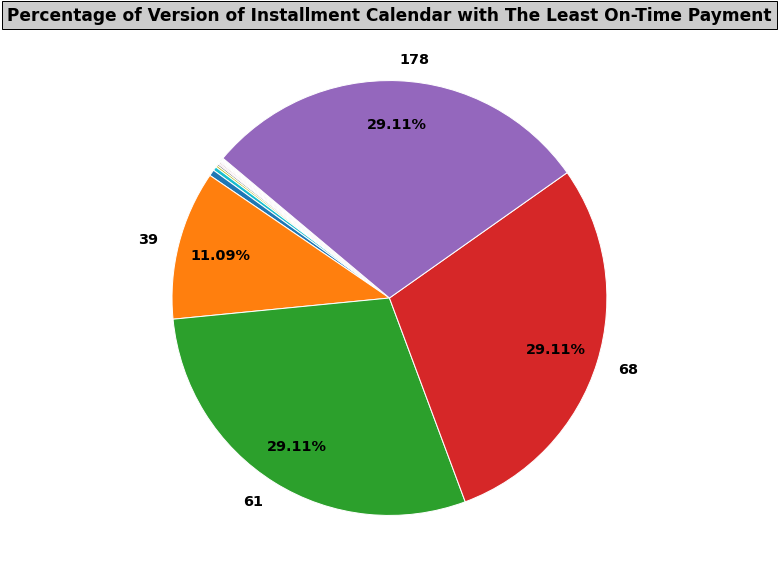

In [137]:
fig2 = plt.figure(figsize = (15,10))
plt.title("Percentage of Version of Installment Calendar with The Least On-Time Payment",
          fontdict={'fontsize':17, 'weight':"bold"},
          bbox={'facecolor':'0.8', 'pad':5})
plt.pie(fig2_data, labels=fig2_labels, startangle=140,
        wedgeprops={'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color':'black', 'weight':'bold'},
        autopct=lambda p: (str(round(p, 2))+"%") if p > 1 else None, pctdistance=0.8)
plt.show

In [12]:
p_cash = pd.read_csv(base_dir+"POS_CASH_balance.csv")
p_cash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [13]:
for i in col_desc[col_desc["Table"]=="POS_CASH_balance.csv"]["Description"]:
    print(i)
    print()

ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

ID of loan in our sample

Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )

Term of previous credit (can change over time)

Installments left to pay on the previous credit

Contract status during the month

DPD (days past due) during the month of previous credit

DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit



In [14]:
prev_app = pd.read_csv(base_dir+"previous_application.csv")
prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [15]:
for i in col_desc[col_desc["Table"]=="previous_application.csv"]["Description"]:
    print(i)
    print()

ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) 

ID of loan in our sample

Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application

Annuity of previous application

For how much credit did client ask on the previous application

Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT

Down payment on the previous application

Goods price of good that client asked for (if applicable) on the previous application

On which day of the week did the client apply for previous application

Approximately at what day hour did the client apply for the previous application

Flag if it w

In [16]:
sample = pd.read_csv(base_dir+"sample_submission.csv")
sample

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


In [17]:
train = pd.read_csv(base_dir+"application_train.csv")
train.head(11)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for i in col_desc[col_desc["Table"]=="application_{train|test}.csv"]["Description"]:
    print(i)
    print()

ID of loan in our sample

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

Identification if loan is cash or revolving

Gender of the client

Flag if the client owns a car

Flag if client owns a house or flat

Number of children the client has

Income of the client

Credit amount of the loan

Loan annuity

For consumer loans it is the price of the goods for which the loan is given

Who was accompanying client when he was applying for the loan

Clients income type (businessman, working, maternity leave,)

Level of highest education the client achieved

Family status of the client

What is the housing situation of the client (renting, living with parents, ...)

Normalized population of region where client lives (higher number means the client lives in more populated region)

Client's age in days at the time of application

How many days before the a

In [19]:
train.shape

(307511, 122)

In [20]:
train_bureau = pd.merge(train, new_b)
train_bureau

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,-397.0,-397.0,15667.155,0,204705.0,0.0,0.0,0.0,Consumer credit,-397
1,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,-397.0,-397.0,15667.155,0,204705.0,0.0,0.0,0.0,Consumer credit,-397
2,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,-397.0,-397.0,15667.155,0,204705.0,0.0,0.0,0.0,Consumer credit,-397
3,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,-397.0,-397.0,15667.155,0,204705.0,0.0,0.0,0.0,Consumer credit,-397
4,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,-397.0,-397.0,15667.155,0,204705.0,0.0,0.0,0.0,Consumer credit,-397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,428134,1,Cash loans,M,N,Y,0,180000.0,127350.0,13500.0,...,-1050.0,-1050.0,NaN,0,90000.0,0.0,0.0,0.0,Consumer credit,-877
494,428134,1,Cash loans,M,N,Y,0,180000.0,127350.0,13500.0,...,-1050.0,-1050.0,NaN,0,90000.0,0.0,0.0,0.0,Consumer credit,-877
495,428134,1,Cash loans,M,N,Y,0,180000.0,127350.0,13500.0,...,-1050.0,-1050.0,NaN,0,90000.0,0.0,0.0,0.0,Consumer credit,-877
496,428134,1,Cash loans,M,N,Y,0,180000.0,127350.0,13500.0,...,-1050.0,-1050.0,NaN,0,90000.0,0.0,0.0,0.0,Consumer credit,-877


In [21]:
T0_tb = train_bureau[train_bureau["TARGET"]==1]
T0_tb["SK_ID_BUREAU"].value_counts()

5891241    13
Name: SK_ID_BUREAU, dtype: int64

Interesetingly, all clients in this dataset with payment difficulties  have some connection with the same credit bureau, which is labeled with the SK ID of 5891241.

In [68]:
T1_tb = train_bureau[train_bureau["TARGET"]==0]
b1counts = T1_tb["SK_ID_BUREAU"].value_counts()[:5]
print(b1counts)

5860921    45
5861474    43
5861475    43
6618670    43
5861472    42
Name: SK_ID_BUREAU, dtype: int64


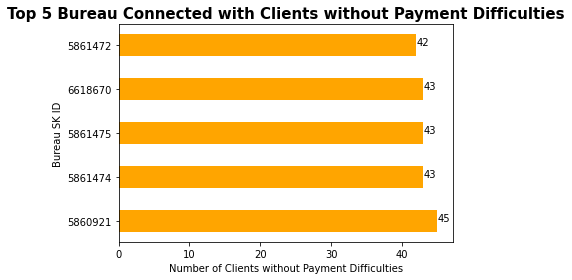

In [73]:
bID = [str(i) for i in b1counts.index.tolist()]
plt.barh(bID, b1counts, height=0.5, color="orange")
plt.xlabel("Number of Clients without Payment Difficulties")
plt.ylabel("Bureau SK ID")
plt.title("Top 5 Bureau Connected with Clients without Payment Difficulties",
          fontsize=15, fontweight="bold")
for i, v in enumerate(b1counts):
    plt.text(v, i, str(v))
plt.show()

as we can see in the plot above, most of the clients without payment difficulties are connected with the bureau of SK ID 5860821

In [ ]:
test = pd.read_csv(base_dir+"application_test.csv")
test.head(11)

In [ ]:
test.shape

In [ ]:
col_desc["Description"][1]

From the headers of the train and test dataframes above we can see that we are expected to predict the Target value based on the other columns/features.

From the columns descriptions, we find that Target indicates client with or without payment difficulties.

DATA CLEANING

(1) Drop single value columns

We don't need columns with only single values as those columns don't add any insight on our model. So we can find and drop those columns.

In [ ]:
train.drop(columns=train.columns[train.nunique()==1], inplace=True)

(2) Check for duplicate rows

In [ ]:
train.duplicated().sum()

(3) Check for outliers

In [ ]:
#find IQR for each column
Q1 = train.quantile(.25)
Q3 = train.quantile(.75)
IQR = Q3-Q1
print(IQR)

Since outliers can only be calculated properly on numerical data, then let's find out what numerical columns do we have

In [ ]:
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = train.select_dtypes(include=numeric).columns
print(num_cols)

Finding outliers on Target and Flag columns would be useless, as they contain only 1 or 0 values.

Thus leaving us with only a few columns to filter: children count, days birth, days employed, days id publish, and hour appr process start.

Considering the amount of rows that we have, immediately removing outliers wouldn't hurt the dataframe.

In [ ]:
out_cols = ['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START']

In [ ]:
train3 = train[~((train[out_cols] < (Q1 - 1.5 * IQR)) |(train[out_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
train3.shape

(4) Convert categorical data

To convert categorical values in the dataset we can use pd.get_dummies

In [ ]:
train4 = pd.get_dummies(train3)
train4

(5) Imputing

After removing outliers, we should find and fix missing or NaN values. We can achieve so by imputing them using the impute function in sklearn.

In [ ]:
#find missing values
print(train4.isnull().sum())

In [ ]:
from sklearn.impute import SimpleImputer
train5 = SimpleImputer().fit_transform(train4)
print(train4.isnull().sum())


FEATURE ENGINEERING